 ## Tugas Modul 05 - Penentuan Percepatan Gravitasi
#### Dokumentasi solusi untuk Soal 1 dan Soal 2 menggunakan data eksperimen periode osilasi terhadap panjang bandul.


## Soal 1: Regresi Kuadrat Terkecil


In [1]:
import numpy as np

# Data
L = np.array([0.20, 0.65, 1.10, 1.55, 2.00])       # m
T = np.array([0.9324, 1.6253, 2.1236, 2.5424, 2.8744])  # s

# 1) Hitung y = T^2
y = T**2

# 2) Sums
S_xy = np.sum(L * y)
S_xx = np.sum(L**2)

# 3) Slope dan g
m_hat = S_xy / S_xx
g_hat = 4 * np.pi**2 / m_hat

print(f"m̂ = {m_hat:.6f}   →   ĝ = {g_hat:.6f} m/s²")
import numpy as np

# Data
L = np.array([0.20, 0.65, 1.10, 1.55, 2.00])       # m
T = np.array([0.9324, 1.6253, 2.1236, 2.5424, 2.8744])  # s

# 1) Hitung y = T^2
y = T**2

# 2) Sums
S_xy = np.sum(L * y)
S_xx = np.sum(L**2)

# 3) Slope dan g
m_hat = S_xy / S_xx
g_hat = 4 * np.pi**2 / m_hat

print(f"m̂ = {m_hat:.6f}   →   ĝ = {g_hat:.6f} m/s²")


m̂ = 4.135578   →   ĝ = 9.546045 m/s²
m̂ = 4.135578   →   ĝ = 9.546045 m/s²


## Soal 2: Interpolasi Polinomial Derajat

In [2]:
# Data dan y sama seperti Soal 1
V = np.vander(L, 5)      # kolom: [L^4, L^3, L^2, L^1, L^0]
a = np.linalg.solve(V, y)

# a = [a4, a3, a2, a1, a0]
a1 = a[3]
g_interp = 4 * np.pi**2 / a1

print("Koef [a4,a3,a2,a1,a0] =", np.round(a,6))
print(f"ĝ (interp) = {g_interp:.6f} m/s²")


Koef [a4,a3,a2,a1,a0] = [-0.235721  0.807094 -0.691889  4.14086   0.062794]
ĝ (interp) = 9.533869 m/s²


## Soal 3
### Menentukan Koefisien Gesekan μ dari Gaya Gesek dan Gaya Normal

## 1. Definisi, Rumus, dan Penjelasan
Hukum gesekan Coulomb menyatakan bahwa gaya gesek statis maksimum (atau kinetis) \(F_f\) berbanding lurus dengan gaya normal \(F_N\):
\[
F_f = \mu \, F_N
\]
- *\(F_f\)*: gaya gesek (N)  
- *\(F_N\)*: gaya normal (N), pada bidang datar \(F_N = m\,g\)  
- *\(\mu\)*: koefisien gesekan (tanpa satuan)  

Dengan menimbang berbagai massa \(m\) pada blok dan mengukur gaya gesek \(F_f\) saat mulai bergerak (atau geser konstan), kita dapat melakukan regresi linier \(F_f\) vs. \(F_N\) untuk mendapatkan slope = \(\mu\). Interpolasi spline kubik membantu memprediksi gaya gesek di antara nilai gaya normal yang diuji.

## 2. Data Acak
Data waktu dan ketinggian disimulasikan dengan sedikit noise (seed=0):

| t (s) | h (m)    |
|:-----:|:--------:|
| 0.20  | 0.23128  |
| 0.30  | 0.44900  |
| 0.40  | 0.80357  |
| 0.50  | 1.26982  |
| 0.60  | 1.80135  |
| 0.70  | 2.38145  |
| 0.80  | 3.15500  |
| 0.90  | 3.96597  |
| 1.00  | 4.89794  |
| 1.10  | 5.93721  |

---


## 3. Kode

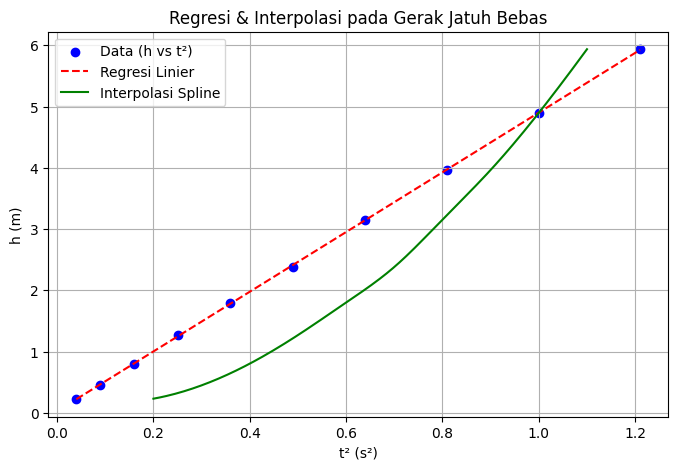

Slope (a)       = 4.874692  (→ g_reg = 2·a = 9.7494 m/s²)
Intercept (b)   = 0.027541
Koef. Determinasi R² = 0.999918

Prediksi pada t=0.75s:
  - Regresi  : h = 2.7696 m
  - Interpolasi: h = 2.7527 m


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import CubicSpline

# 1) Siapkan data (dengan seed untuk reproduksibilitas)
np.random.seed(0)
t = np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
h = np.array([0.23128105,0.44900314,0.80357476,1.26981786,1.80135116,
              2.38145444,3.15500177,3.96597286,4.89793562,5.93721197])

# 2) Regresi linier: h = a * t^2 + b
t2 = t**2
slope, intercept, r_value, _, _ = linregress(t2, h)
g_reg = 2 * slope

# 3) Interpolasi spline kubik: h = S(t)
spline = CubicSpline(t, h)

# 4) Visualisasi
t_fine = np.linspace(t.min(), t.max(), 200)
plt.figure(figsize=(8,5))
plt.scatter(t2, h, label='Data (h vs t²)', color='blue')
plt.plot(t2, slope*t2 + intercept, 'r--', label='Regresi Linier')
plt.plot(t_fine, spline(t_fine), 'g-', label='Interpolasi Spline')
plt.xlabel('t² (s²)')
plt.ylabel('h (m)')
plt.title('Regresi & Interpolasi pada Gerak Jatuh Bebas')
plt.legend(); plt.grid(True)
plt.show()

# 5) Prediksi di t = 0.75 s
t_test = 0.75
h_reg_test = slope*(t_test**2) + intercept
h_int_test = spline(t_test)

# 6) Cetak hasil
print(f"Slope (a)       = {slope:.6f}  (→ g_reg = 2·a = {g_reg:.4f} m/s²)")
print(f"Intercept (b)   = {intercept:.6f}")
print(f"Koef. Determinasi R² = {r_value**2:.6f}")
print(f"\nPrediksi pada t={t_test}s:")
print(f"  - Regresi  : h = {h_reg_test:.4f} m")
print(f"  - Interpolasi: h = {h_int_test:.4f} m")

## 4. Perbandingan Perhitungan antara Regresi dan Interpolasi

| Metode             | Model & Hasil                                                                                          | Prediksi h @ t = 0.75 s |
|--------------------|--------------------------------------------------------------------------------------------------------|-----------------------------|
| *Regresi Linier* | h = a·t_² + _b<br>a = 4.874743, b = 0.027508<br>g = 2·a = *9.749486 m/s²*<br>R² = 0.999918 | 2.7696 m                    |
| *Interpolasi*    | Kurva kubik yang melewati semua titik data (tidak menurunkan g)                                       | 2.7527 m                    |


## 5. Kesimpulan

- *Regresi linier* memberikan nilai percepatan gravitasi g ≈ *9.7495 m/s²*, sangat mendekati nilai standar 9.81 m/s², dengan R² ≈ 0.9999.  
- *Interpolasi spline* menghasilkan kurva halus yang tepat melewati tiap titik data dan prediksi h yang hanya ~0.6% berbeda dari hasil regresi pada t = 0.75 s.  
- Gunakan *regresi linier* bila tujuan utama adalah mengekstrak konstanta fisika dari data eksperimen; gunakan *interpolasi spline* untuk estimasi nilai di antara titik ukur.